## Old vs New 60hr productions

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from scipy.optimize import curve_fit

import gm2
import trfp
import plotting_functions as plt2
import analysis_helper as helper
import helper_function_candidates as helper_old

import generate_dfs_helper as dfin

Welcome to JupyROOT 6.12/04


In [ ]:
prefix = 'data1/newg2/DataProduction/Offline/ArtTFSDir/v9_20_00/FieldPlainRootOutput_'

in_df_1 = helper.root_to_pandas(range(3959,3995), prefix=prefix, sanitize=False)

In [ ]:
prefix = 'data1/newg2/DataProduction/Offline/ArtTFSDir/v9_21_05_dev/FieldPlainRootOutput_'

in_df_2 = helper.root_to_pandas(range(3959,3995), prefix=prefix, sanitize=False)

In [ ]:
diff_df = in_df_2 - in_df_1

In [ ]:
dt = 1000
start = np.ceil(diff_df.index.values[0]/dt)*dt
end = np.floor(diff_df.index.values[-1]/dt)*dt

bin_edges = np.arange(start, end+dt, dt)
bin_centers = np.arange(start, end, dt)+dt/2

bin_df = diff_df.groupby(pd.cut(diff_df.index, bin_edges)).mean()
bin_df.index = bin_centers

## Bloch vs Purcell

In [13]:
bloch = np.loadtxt('utility_files/2020-03-03_bloch.txt', skiprows=0, delimiter=',')
purcell = np.loadtxt('utility_files/2020-02-26_purcell.csv', skiprows=1, delimiter=',')

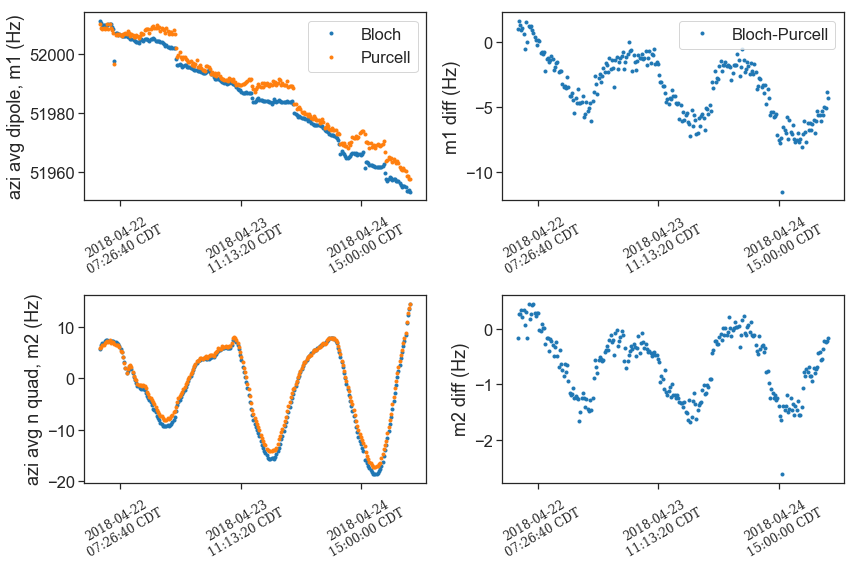

In [22]:
fig, axs = plt.subplots(2,2)

axs[0,0].plot(bloch[:,0], bloch[:,1], '.', label='Bloch')
axs[0,0].plot(purcell[:,0], purcell[:,1], '.', label='Purcell')
axs[0,1].plot(bloch[:,0], bloch[:,1] - purcell[:,1], '.', label='Bloch-Purcell')

axs[1,0].plot(bloch[:,0], bloch[:,3], '.')
axs[1,0].plot(purcell[:,0], purcell[:,2], '.')
axs[1,1].plot(bloch[:,0], bloch[:,3] - purcell[:,2], '.')

axs[0,0].set_ylabel('azi avg dipole, m1 (Hz)')
axs[0,1].set_ylabel('m1 diff (Hz)')
axs[1,0].set_ylabel('azi avg n quad, m2 (Hz)')
axs[1,1].set_ylabel('m2 diff (Hz)')

axs[0,0].legend()
axs[0,1].legend()

plt2.plt_unix_time_to_CST(axs[0,0])
plt2.plt_unix_time_to_CST(axs[0,1])
plt2.plt_unix_time_to_CST(axs[1,0])
plt2.plt_unix_time_to_CST(axs[1,1])

fig.set_size_inches(12,8)
fig.tight_layout()

## The difference between v9_20 and v9_21_05_dev
Just as a brief reminder from Thursday, this is the (extremely naive) difference between the two production versions of the 60hr dataset.

In [ ]:
plt.plot(bin_df.mean(axis=1), '.')

In [3]:
old = np.loadtxt('utility_files/purcell_8-5_st5.csv', skiprows=1, delimiter=',')
new = np.loadtxt('hdf5/comparison/60hr_vtm_1_comparison.csv', skiprows=1, delimiter=',')
rerun_old = np.loadtxt('utility_files/60hr_2-25-2020_v920.csv', skiprows=1, delimiter=',')

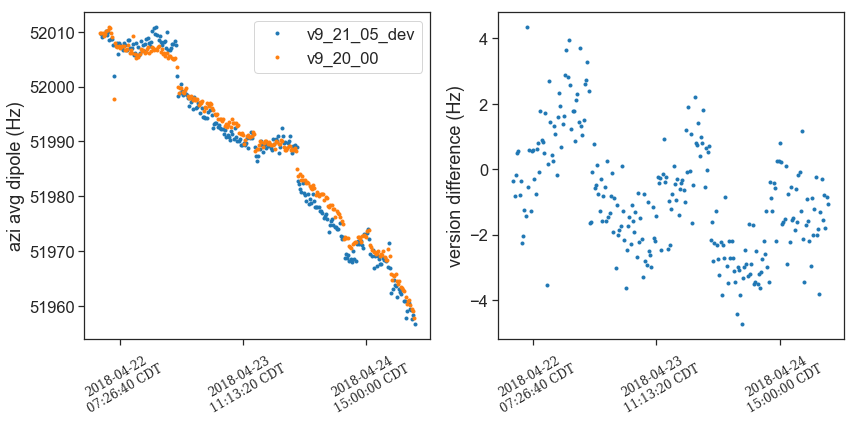

In [11]:
fig, axs = plt.subplots(1,2)

axs[0].plot(new[:,0], new[:,1], '.', label='v9_21_05_dev')
axs[0].plot(old[:,0], old[:,1]*61.79, '.', label='v9_20_00')

axs[1].plot(old[:,0], new[:,1]-old[:,1]*61.79, '.', label='v9_21_05_dev - v9_20_00')

axs[0].legend()

axs[0].set_ylabel('azi avg dipole (Hz)')
axs[1].set_ylabel('version difference (Hz)')

plt2.plt_unix_time_to_CST(axs[0])
plt2.plt_unix_time_to_CST(axs[1])

fig.set_size_inches(12,6)
fig.tight_layout()


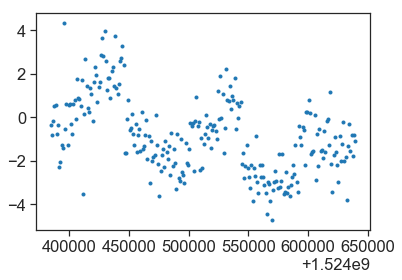

In [10]:
plt.plot(new[:,0], new[:,1]-old[:,1]*61.79, '.')

## The difference in the actual VTM tracking between data sets
The blue curve is the old production (from last August, comparison with Rachel), and the orange is the new. Note that the difference has a shape very similar to the difference of the naive averages of the datasets.

In [ ]:
plt.plot(old[:,0], old[:,1]*61.79, '.')
plt.plot(new[:,0], new[:,1], '.')

In [ ]:
start = np.max([old[0,0], new[0,0]])
end = np.min([old[-1,0], new[-1,0]])

times = np.arange(start, end, 1000)

In [ ]:
old_interp = np.interp(times, old[:,0], old[:,1])
new_interp = np.interp(times, new[:,0], new[:,1])

In [ ]:
plt.plot(times, new_interp-old_interp*61.79, '.')

## Is this difference just caused by the new production, or has something in the analysis code changed at this fundamental level?
Run the *current* analysis on the `v9_20_00` production, and compare it the the old version.

The offset is caused by different trolley probe calibrations between last August and now.

Note that the difference is very linear --- this means that the only difference in the analysis is at the trolley runs Several updates **have** been made to the trolley analysis, especially concerning the footprint removal, so this slight linear shape is expected.

In [ ]:
plt.plot(old[:,0], old[:,1]*61.79, '.')
plt.plot(rerun_old[:,0], rerun_old[:,1], '.')

In [ ]:
plt.plot(old[:,0], rerun_old[:,1] - old[:,1]*61.79, '.')

## Conclusion
The current version of the analysis is consistent with the analysis used to reach good agreement with Rachel last year.

I recommend a similar program between Bloch and Purcell as last year, starting with turning on and off various differences to try to account for the large difference we see now.

I also recommend running this program on the unblinded 60hr dataset for now and coming to an understanding of our differences before moving on to the other dataset.

Depending on how quickly this goes, I would estimate this will take ~1 week.

## Compare against my own "Bloch-like" analysis

In [2]:
purcell = np.loadtxt('utility_files/2020-02-26_purcell.csv', skiprows=1, delimiter=',')
bloch_like = np.loadtxt('utility_files/2020-02-26_bloch-like.csv', skiprows=1, delimiter=',')
bloch = np.loadtxt('utility_files/2020-03-03_bloch.txt', skiprows=0, delimiter=',')

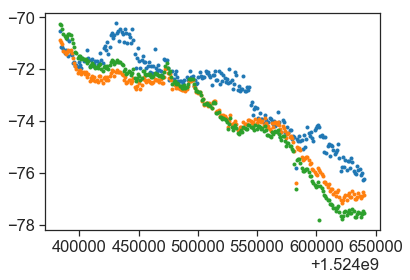

In [3]:
plt.plot(purcell[:,0], purcell[:,5], '.')
plt.plot(bloch_like[:,0], bloch_like[:,5], '.')
plt.plot(bloch[:,0], bloch[:,7], '.')

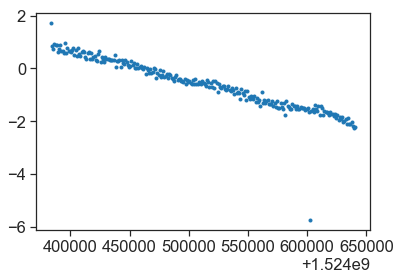

In [8]:
# plt.plot(purcell[:,0], bloch_like[:,1]-purcell[:,1], '.')
# plt.plot(purcell[:,0], bloch[:,1]-purcell[:,1], '.')
plt.plot(purcell[:,0], bloch[:,1]-bloch_like[:,1], '.')